In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("E:\Data Science\Assignments\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name=1)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Filling the missing values with median.
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [9]:
# Summary statistics
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


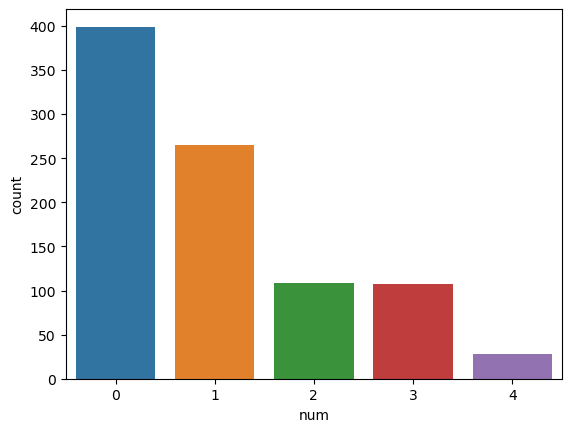

In [10]:
# Distribution of target variable
sns.countplot(x='num', data=df)
plt.show()

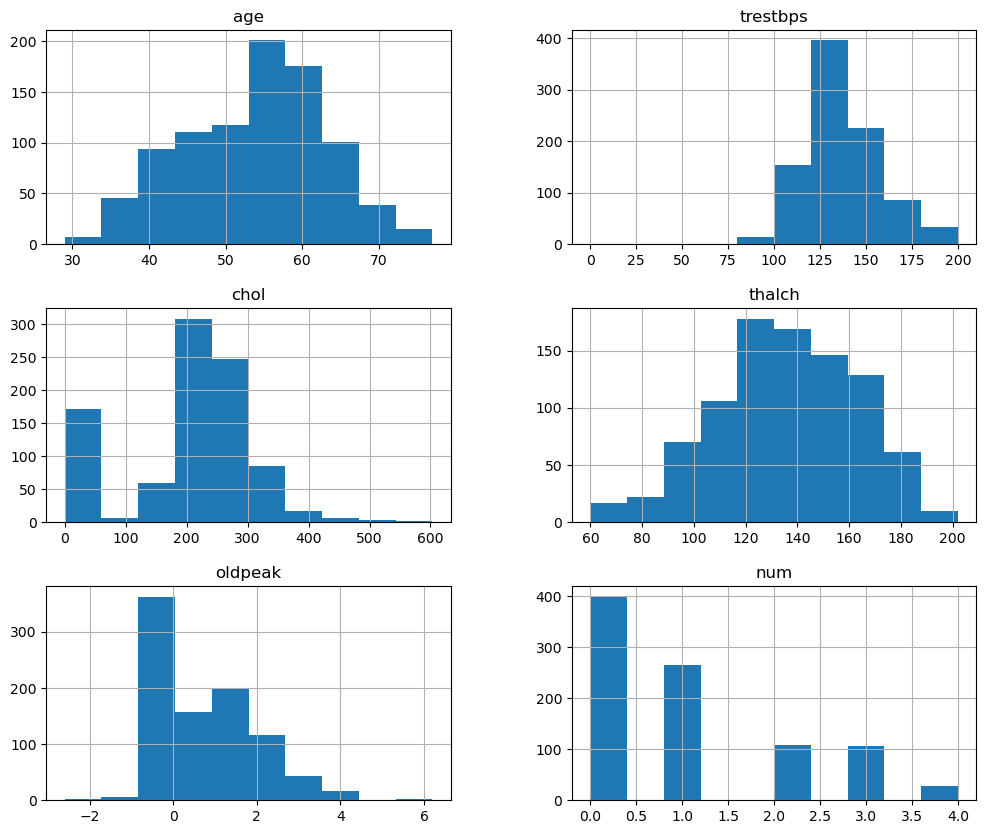

In [11]:
# Distribution of numerical features
df.hist(figsize=(12,10))
plt.show()


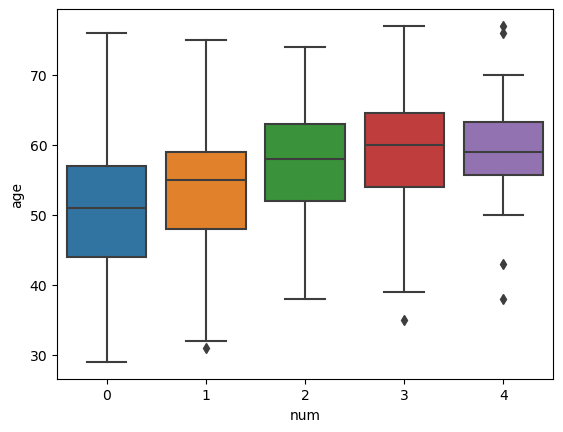

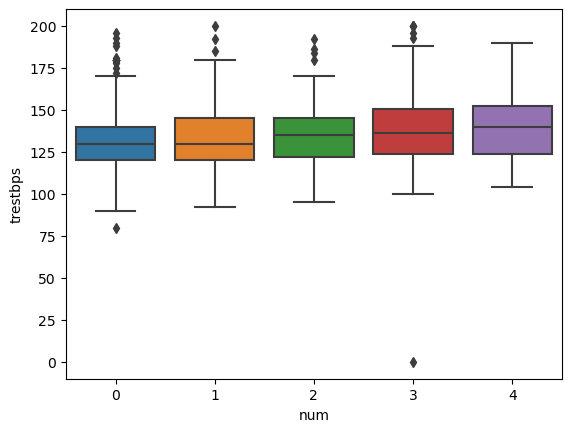

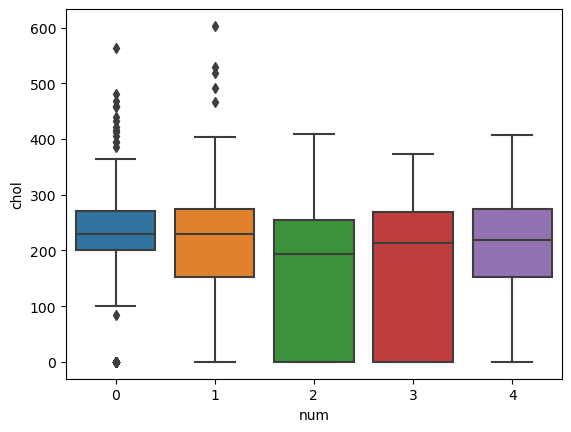

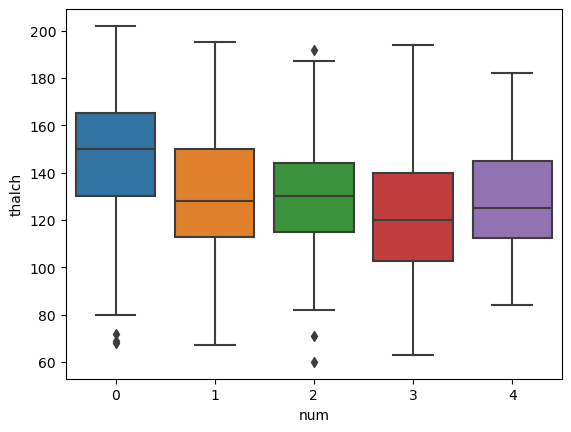

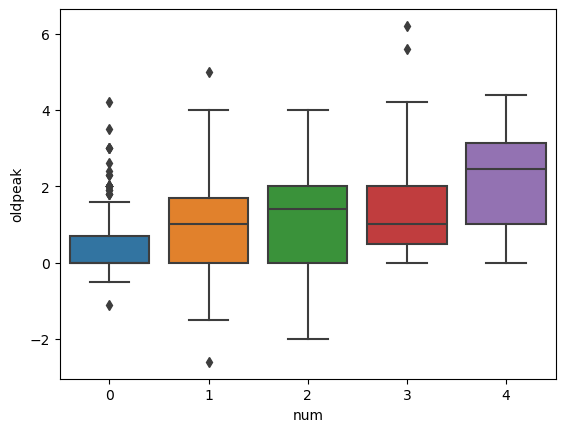

In [12]:
# Box plots for numerical features vs target variable
sns.boxplot(x='num', y='age', data=df)
plt.figure()
sns.boxplot(x='num', y='trestbps', data=df)
plt.figure()
sns.boxplot(x='num', y='chol', data=df)
plt.figure()
sns.boxplot(x='num', y='thalch', data=df)
plt.figure()
sns.boxplot(x='num', y='oldpeak', data=df)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


#### Feature Engineering

In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

In [15]:
df.fbs.value_counts()

fbs
False    723
True     185
Name: count, dtype: int64

In [16]:
df['fbs'] = df['fbs'].astype(int)

In [17]:
df.exang.value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [18]:
# Replace string values with numerical equivalents
df['exang'] = df['exang'].replace({'FALSE': 0, 'TURE': 1})

df['exang'] = df['exang'].astype(int) # Now convert to integer

In [19]:
df.exang.value_counts()

exang
0    535
1    373
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int32  
 2   cp        908 non-null    int32  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int32  
 6   restecg   908 non-null    int32  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int32  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int32  
 11  thal      908 non-null    int32  
 12  num       908 non-null    int64  
dtypes: float64(1), int32(7), int64(5)
memory usage: 67.5 KB


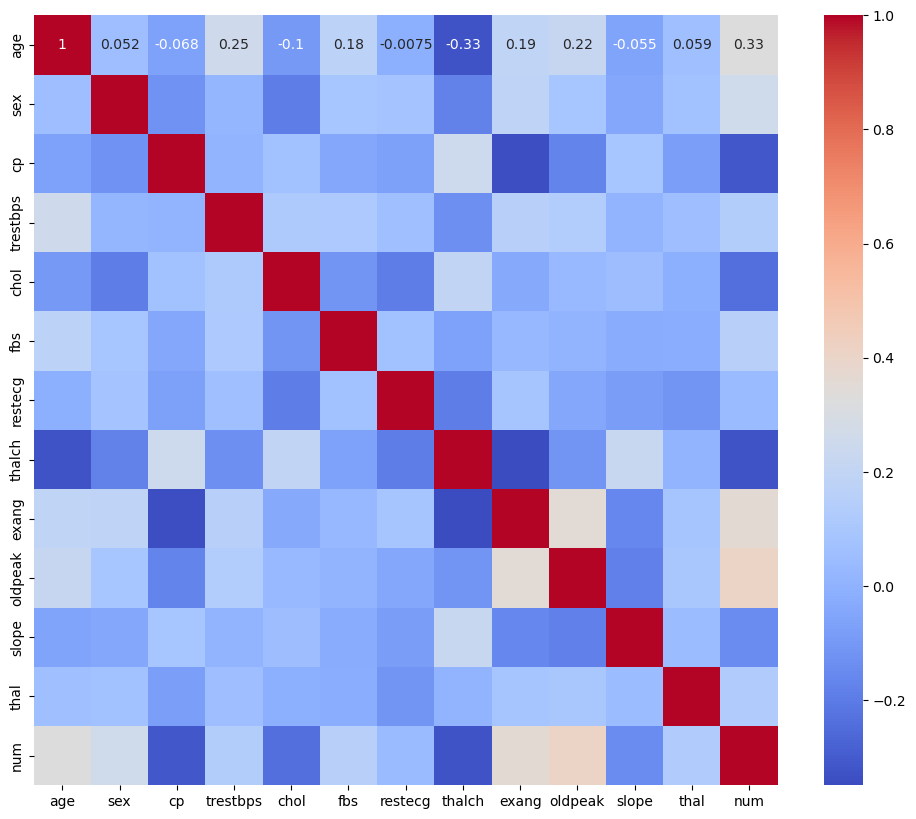

In [21]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Data Partition
X = df.drop('num', axis=1)
y = df['num']

In [23]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Model fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [26]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision (macro):", precision_score(y_test, y_pred_test, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_test, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 0.5
Precision (macro): 0.29392773892773894
Recall (macro): 0.29646848524905367
F1 Score (macro): 0.29502901900359524
Confusion Matrix:
 [[65 14  5  4  1]
 [16 18  9  5  0]
 [ 4  5  7  5  1]
 [ 3 10  0  1  3]
 [ 0  5  1  0  0]]


In [27]:
# Fitting the decision tree model with best suitable hyperparameters

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new decision tree model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [28]:
# Prediction with best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [29]:
# Metrics of best model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision (macro):", precision_score(y_test, y_pred_test, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_test, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_test, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.6253443526170799
Testing Accuracy: 0.5439560439560439
Precision (macro): 0.31952380952380954
Recall (macro): 0.3103559554567486
F1 Score (macro): 0.3015844721727075
Confusion Matrix:
 [[70 13  5  1  0]
 [21 23  4  0  0]
 [ 2 13  5  2  0]
 [ 5  6  5  1  0]
 [ 0  5  1  0  0]]


In [30]:
# Count the number of nodes in the tree
num_nodes = best_model.tree_.node_count
print("Number of nodes in the tree:", num_nodes)

# Count the depth of the tree
depth = best_model.tree_.max_depth
print("Depth of the tree:", depth)


Number of nodes in the tree: 55
Depth of the tree: 5


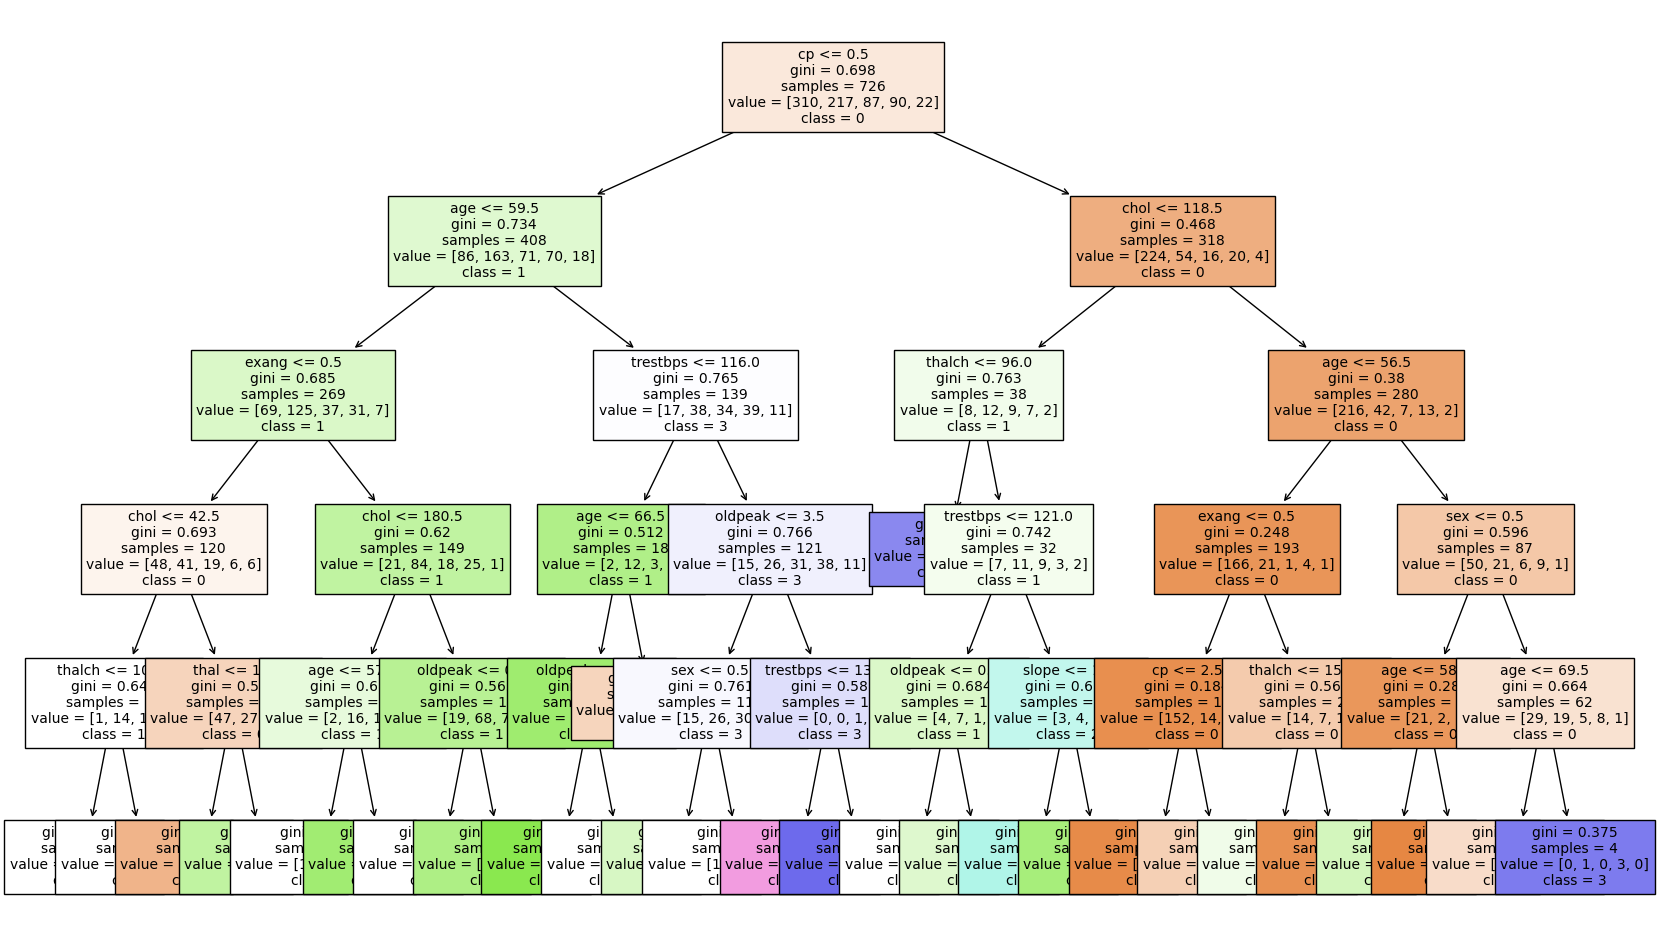

In [31]:
# Plotting the tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 12))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['0','1','2','3','4'],fontsize=10)
plt.show()


### Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

The hyperparameters of the decision tree model are
- Max Depth (max_depth)
- Minimum Samples Split (min_samples_split)
- Minimum Samples Leaf (min_samples_leaf)
- Maximum Features (max_features)
- Maximum Leaf Nodes (max_leaf_nodes)
- Minimum Impurity Decrease (min_impurity_decrease)
- Criterion (criterion)

### 2. What is the difference between the Label encoding and One-hot encoding?

The difference between Label Encoding and One-Hot Encoding lies in how they convert categorical data into numerical data:

- Label Encoding:

  Converts each category into a unique integer label.
  Example: "Red" -> 0, "Green" -> 1, "Blue" -> 2.
  Use Case: Suitable for ordinal data where there is a natural order.

- One-Hot Encoding:

  Converts each category into a binary vector, where only one element is 1 and the rest are 0.
  Example: "Red" -> [1, 0, 0], "Green" -> [0, 1, 0], "Blue" -> [0, 0, 1].
  Use Case: Suitable for nominal data where there is no natural order.